# Exercise 1: Parameters versus Hyperparameters

In [13]:
import numpy as np

# Example of parameters (weights and biases) in a simple neural network layer

# Assume an input layer with 3 neurons and a hidden layer with 2 neurons
input_size = 3
hidden_size = 2

# Initialize weights randomly (these are parameters to be learned)
weights = np.random.rand(input_size, hidden_size)
print("Initial Weights (Parameter):\n", weights)

# Initialize biases randomly (these are parameters to be learned)
biases = np.random.rand(hidden_size)
print("\nInitial Biases (Parameter):\n", biases)

# Example of hyperparameters (set before training)

# Learning rate: controls the step size during optimization
learning_rate = 0.01
print("\nLearning Rate (Hyperparameter):", learning_rate)

# Number of hidden layers: defines the network architecture
num_hidden_layers = 1
print("Number of Hidden Layers (Hyperparameter):", num_hidden_layers)

# Number of neurons in the hidden layer
num_neurons_hidden = 2
print("Number of Neurons in Hidden Layer (Hyperparameter):", num_neurons_hidden)

# Activation function: introduces non-linearity
activation_function = 'relu'
print("Activation Function (Hyperparameter):", activation_function)

Initial Weights (Parameter):
 [[0.79599363 0.66739529]
 [0.24395445 0.10487379]
 [0.03447322 0.6116418 ]]

Initial Biases (Parameter):
 [0.35070274 0.29024164]

Learning Rate (Hyperparameter): 0.01
Number of Hidden Layers (Hyperparameter): 1
Number of Neurons in Hidden Layer (Hyperparameter): 2
Activation Function (Hyperparameter): relu


## Parameters
**Parameters** are the internal variables of the neural network that are learned from the training data during the learning process. These are the values that the network adjusts iteratively to minimize the error between its predictions and the actual target values.

*   In above code, we define the size of an input layer (input_size) and a hidden layer (hidden_size).
*   **weights** is initialized as a NumPy array representing the connection strengths between the input layer and the hidden layer. The shape (input_size, hidden_size) indicates that each neuron in the input layer is connected to each neuron in the hidden layer. These initial weights are random values, and the training process will adjust these values to learn the underlying patterns in the data.
*    **Biases** is initialized as a NumPy array representing the bias term for each neuron in the hidden layer. The shape (hidden_size,) indicates one bias value per neuron. Similar to weights, these biases are also learned during training.

The print() statements display the initial random values of the weights and biases, emphasizing that these are the internal parameters that the network will learn.

Note that the primary parameters in a neural network are the weights of the connections between neurons in different layers and the biases associated with each neuron. Weights determine the strength and direction of the connection between neurons, essentially dictating the influence of one neuron's activation on another. Biases introduce an offset to the activation of a neuron, allowing the network to learn patterns even when the input features are all zero. The values of these parameters are not set by the user beforehand but are instead learned through optimization algorithms like gradient descent. The goal of the training process is to find the optimal set of weights and biases that enable the network to accurately map input data to output predictions.

## Hyperparameters
**Hyperparameters** are settings that are external to the model and are set by the data scientist before the training process begins. These parameters govern the overall learning process and the architecture of the neural network itself. They are not learned from the data but rather influence how the learning algorithm operates and the structural properties of the network.

*   **learning_rate** is a scalar value that controls the magnitude of the updates to the weights and biases during each iteration of the optimization algorithm. A smaller learning rate can lead to more stable but potentially slower convergence, while a larger learning rate can lead to faster but potentially unstable training.
*   **num_hidden_layers** specifies the number of hidden layers in the neural network's architecture. This is a structural decision made before training.
*   num_neurons_hidden defines the number of neurons within the hidden layer. This also determines the capacity of the hidden layer to learn complex representations.
*   **activation_function** specifies the non-linear function applied to the output of each neuron. Common examples include 'relu', 'sigmoid', and 'tanh'. The choice of activation function influences the network's ability to model non-linear relationships in the data.

The print() statements display the values assigned to these hyperparameters, highlighting that these are set by the user before the training process commences and control various aspects of the network's architecture and learning behavior.

Examples of hyperparameters include the number of hidden layers, the number of neurons in each hidden layer, the learning rate of the optimization algorithm, the batch size used during training, the activation functions applied to the neurons, and the regularization techniques employed. The choice of hyperparameters significantly impacts the model's performance, affecting its ability to generalize to unseen data, the speed of convergence during training, and the risk of overfitting or underfitting. Selecting appropriate hyperparameter values often involves experimentation, intuition, and systematic search techniques such as grid search or random search.

# Exercise 2: Total number of Parameters (weights and biases)

In [14]:
def calculate_parameters(input_size, hidden_layers, output_size):
    total_parameters = 0

    # Parameters from input layer to the first hidden layer
    if hidden_layers:
        total_parameters += (input_size * hidden_layers[0]) + hidden_layers[0]

        # Parameters between hidden layers
        for i in range(len(hidden_layers) - 1):
            total_parameters += (hidden_layers[i] * hidden_layers[i+1]) + hidden_layers[i+1]

        # Parameters from the last hidden layer to the output layer
        total_parameters += (hidden_layers[-1] * output_size) + output_size
    else:
        # Parameters directly from input to output layer (no hidden layers)
        total_parameters += (input_size * output_size) + output_size

    return total_parameters

# Define the network architecture
input_neurons = 5  # Assuming 5 input features
hidden_neurons = [8, 4, 2]
output_neurons = 1

# Calculate the total number of parameters
total_params = calculate_parameters(input_neurons, hidden_neurons, output_neurons)
print(f"Total number of parameters in the neural network: {total_params}")
# Input Layer to Hidden Layer 1: (ninput​×8)+8 = (5×8)+8 = 40+8 = 48
# Hidden Layer 1 to Hidden Layer 2 = (8×4)+4  = 32+4    = 36
# Hidden Layer 2 to Hidden Layer 3 = (4×2)+2  = 8+2     = 10
# Hidden Layer 3 to Output Layer   = (2×1)+1  = 2+1     = 3
# Total = 48 + 36 + 10 + 3 = 97

Total number of parameters in the neural network: 97


To determine the grand total number of parameters in the network, we sum the parameters from each layer.

Parameters from Input to Hidden Layer 1:
It has  8 neurons. The number of weights connecting the input layer to the first hidden layer is ninput​×8. The number of biases for this layer is 8 (one for each neuron). Therefore, the total parameters for the first hidden layer are (ninput​×8)+8.

      (5×8)+8= 40+8= 48

Parameters from Hidden Layer 1 to Hidden Layer 2:
It has 4 neurons. The number of weights connecting the first hidden layer to the second hidden layer is 8×4. The number of biases for this layer is 4. Thus, the total parameters for the second hidden layer are

      (8×4)+4= 32+4= 36

Parameters from Hidden Layer 2 to Hidden Layer 3:
It has 2 neurons. The number of weights connecting the second hidden layer to the third hidden layer is 4×2. The number of biases for this layer is 2. Hence, the total parameters for the third hidden layer are

      (4×2)+2=8+2=10

Parameters from Hidden Layer 3 to Output Layer:
Since the problem is binary classification (predicting churn or no churn), the output layer will typically have 1 neuron representing the probability of churn. The number of weights connecting the third hidden layer to the output layer is 2×1. The number of biases for this layer is 1. Consequently, the total parameters for the output layer are

      (2×1)+1=2+1=3

Therefore, the total number of parameters in the neural network with 5 input features is

      48+36+10+3=97

# Exercise 3: Sample of neural network architecture
## Note: Do try out the epochs of 10, 50 and 100, and observe their effects

In [15]:
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define the neural network architecture based on the case study
fea_num = 13 # Say, ywe have 13 input features
model = tf.keras.models.Sequential([
    # First hidden layer with 8 neurons and ReLU activation
    tf.keras.layers.Dense(8, activation='relu', input_shape=(fea_num,)),
    # Second hidden layer with 4 neurons and ReLU activation
    tf.keras.layers.Dense(4, activation='relu'),
    # Third hidden layer with 2 neurons and ReLU activation
    tf.keras.layers.Dense(2, activation='relu'),
    # Output layer with 1 neuron (for churn probability) and sigmoid activation
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model, specifying the optimizer, loss function, and metrics
# Hyperparameter setting: Adam optimizer with learning rate 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer,
              # Suitable loss function for binary classification (churn/no churn)
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Generate synthetic binary classification data
X, y = make_classification(n_samples=300, n_features=fea_num, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)
y = y.reshape(-1, 1)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Example of setting batch size and number of epochs during training
batch_size = 32
epochs = 10 # Try out the epochs of 10, 50 and 100
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 8)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.4924 - loss: 0.7710 - val_accuracy: 0.3810 - val_loss: 0.7273
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5874 - loss: 0.6356 - val_accuracy: 0.4048 - val_loss: 0.7188
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5814 - loss: 0.6254 - val_accuracy: 0.4524 - val_loss: 0.6919
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6792 - loss: 0.5801 - val_accuracy: 0.5714 - val_loss: 0.6603
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7760 - loss: 0.5172 - val_accuracy: 0.6190 - val_loss: 0.6314
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8378 - loss: 0.4696 - val_accuracy: 0.7143 - val_loss: 0.5768
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8711 - loss: 0.4215 - val_accuracy: 0.8095 - val_loss: 0.5135
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9306 - loss: 0.3927 - val_accuracy: 0.8095 - val_loss: 0.4974


The description of the neural network architecture implicitly reveals several key hyperparameters and their specific settings. The most evident hyperparameters are the number of hidden layers and the number of neurons per hidden layer.

In above code, the architecture employs **three** hidden layers. The respective settings for the number of neurons in these layers are 8 neurons in the first hidden layer, 4 neurons in the second hidden layer, and 2 neurons in the third hidden layer. These choices regarding the depth and width of the network directly influence its capacity to learn complex patterns from the input data. **A deeper network with more neurons can theoretically model more complex relationships; however, it also increases the risk of overfitting, especially with limited training data.**


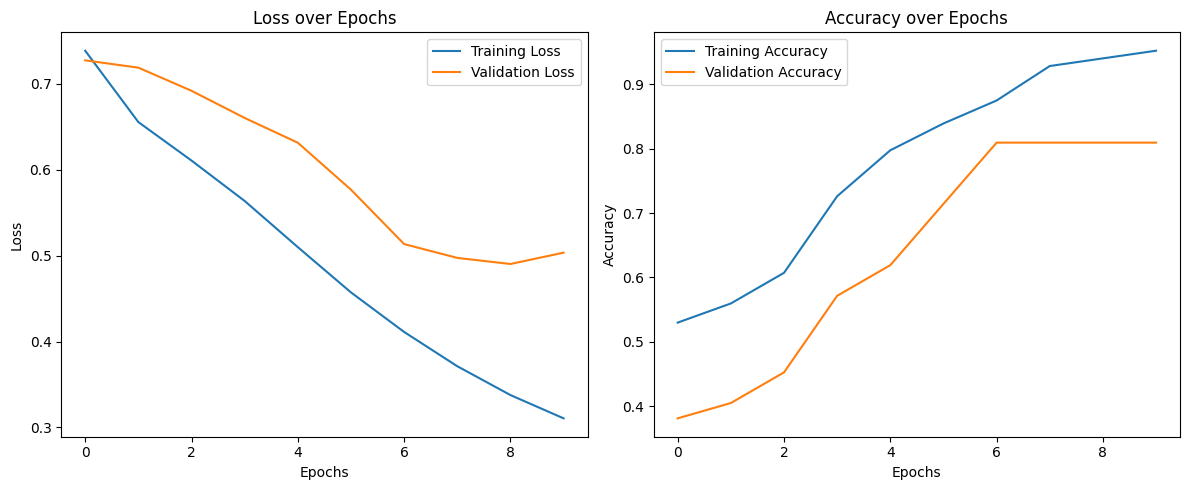

In [16]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Exercise 4: Sample of neural network architecture

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Assume 10 input features for customer data
num_features = 10

# Define the neural network model
model = keras.Sequential([
    layers.Input(shape=(num_features,)),
    layers.Dense(16, activation='relu', name='hidden_layer_1'),
    layers.Dense(8, activation='relu', name='hidden_layer_2'),
    layers.Dense(1, activation='sigmoid', name='output_layer')
])

# Print the model summary to see the architecture and number of parameters
model.summary()

# Example of compiling the model (loss function and optimizer)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# You would then proceed to load your data and train the model
# For example:
# X_train = ... # Your training data
# y_train = ... # Your training labels
# model.fit(X_train, y_train, epochs=10, batch_size=32)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

To construct a related neural network architecture for the customer churn prediction problem, we can consider an alternative configuration that maintains the core principles of capturing non-linear relationships and handling mixed data types but explores a slightly different depth and width. **In above code, we design a network with two hidden layers, where the first layer has a larger number of neurons to potentially capture more initial complex features, followed by a narrower layer to refine the learned representations before the final prediction.**

*   **Input Layer**: The number of input neurons will correspond to the number of customer attributes used for prediction (e.g., age, income, product usage, internet banking adoption, etc.). Let's assume there are 10 input features for this example.
*   **First Hidden Layer**: This layer will have a larger number of neurons, say 16, to allow the network to learn a broader set of initial features from the input data. We will use the Rectified Linear Unit (ReLU) activation function, which is commonly employed for its ability to introduce non-linearity and mitigate the vanishing gradient problem.
*   **Second Hidden Layer**: This layer will have a smaller number of neurons, say 8, to further process and refine the features learned by the first hidden layer before making the final prediction. We will also use the ReLU activation function for this layer.
*   **Output Layer**: Since the task is binary classification (predicting whether a customer will churn or not), the output layer will consist of a single neuron with a sigmoid activation function. The sigmoid function will output a probability between 0 and 1, representing the likelihood of customer churn.

Note that the wider first layer might enable the model to capture a richer set of initial features, while the subsequent narrower layer can focus on extracting the most relevant information for the churn prediction task.


# Exercise 5: Sample of neural network architecture
## Note: Do try out the epochs of 5, 50 and 100, and observe their effects

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# 1. Generate synthetic customer churn data
X, y = make_classification(n_samples=20000, n_features=5, n_informative=3,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1, random_state=42)

# Say the features represent:
# Feature 0: Purchase Frequency
# Feature 1: Average Order Value
# Feature 2: Customer Tenure
# Feature 3: Satisfaction Score
# Feature 4: Geographic Location (simplified as a numerical proxy)

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Define the Neural Network model architecture
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],), name='Input_Layer'),
    layers.Dense(16, activation='relu', name='Hidden_Layer_1'),
    layers.Dense(8, activation='relu', name='Hidden_Layer_2'),
    layers.Dense(1, activation='sigmoid', name='Output_Layer') # Binary classification: churn or not churn
])

# 5. Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 6. Train the model
epochs = 5
batch_size = 32
history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(X_test_scaled, y_test), verbose=1)

# 7. Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8062 - loss: 0.4499 - val_accuracy: 0.9852 - val_loss: 0.0702
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9883 - loss: 0.0617 - val_accuracy: 0.9870 - val_loss: 0.0536
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9880 - loss: 0.0539 - val_accuracy: 0.9870 - val_loss: 0.0512
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9864 - loss: 0.0556 - val_accuracy: 0.9868 - val_loss: 0.0504
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9868 - loss: 0.0566 - val_accuracy: 0.9868 - val_loss: 0.0503
Test Loss: 0.0503
Test Accuracy: 0.9868


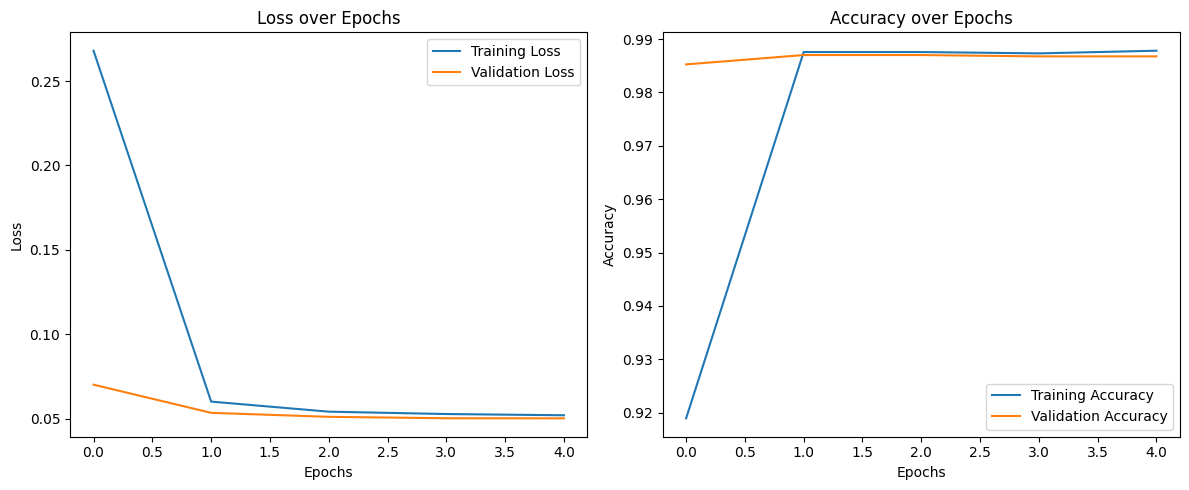

In [19]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
from tensorflow.keras.utils import plot_model
import os

# Ensure the 'model_architectures' directory exists
output_dir = 'model_architectures'
os.makedirs(output_dir, exist_ok=True)
file_path = os.path.join(output_dir, 'churn_prediction_model.png')

# Generate the plot of the model architecture
plot_model(model, to_file=file_path, show_shapes=True, show_layer_names=True,
           rankdir='TB', expand_nested=True, dpi=96)

print(f"Neural Network architecture diagram saved to: {file_path}")

Neural Network architecture diagram saved to: model_architectures/churn_prediction_model.png
